Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

In [2]:
# Importing the California House Price Dataset
house_price_dataset = fetch_california_housing()

In [3]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [4]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [5]:
# Prrint the 1st 5 rows of the dataset
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# Add the target (prices of the house) coulumn to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [7]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# checking the no. of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [9]:
# check for the missing vaues
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [10]:
# statistical methods of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


understanding the coorelation between various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = house_price_dataframe.corr()

<Axes: >

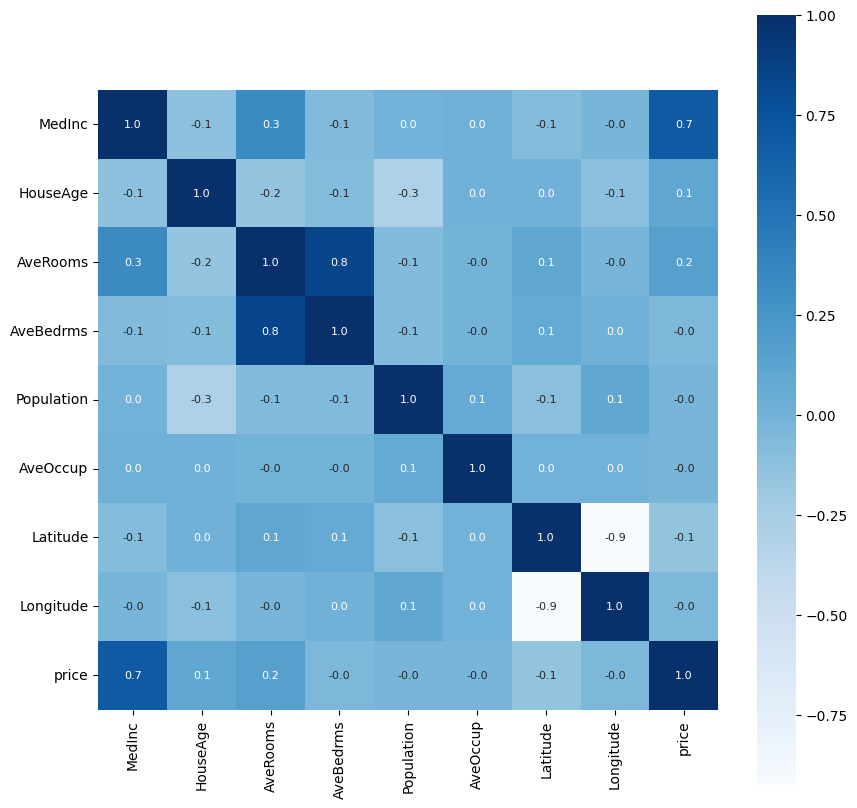

In [12]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and the Target

In [13]:
 X = house_price_dataframe.drop(['price'], axis = 1)
 Y = house_price_dataframe['price']

In [14]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Spliting the data into the Training data and the Test data

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor model

In [24]:
 # loading the model
 model=XGBRegressor(n_estimators=10000, max_depth=20, learning_rate=0.01)

In [ ]:
# training the model with the X_train
model.fit(X_train, Y_train)


Evaluation

Predicttion on training data

In [ ]:
# accuracy for prediction om the training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

In [21]:
# R Squared Error
score_1=metrics.r2_score(Y_train,training_data_prediction)
# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)


NameError: name 'training_data_prediction' is not defined

In [ ]:
print("R Squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

Visualising the actual Prices and the Predicted Prices

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()


Evaluation

Prediction on the Test data

In [ ]:
# accuracy for prediction om the test data
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

In [ ]:
# R Squared Error
score_1=metrics.r2_score(Y_test,test_data_prediction)
# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)


In [ ]:
print("R Squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

In [ ]:
# Calculate the accuracy percentage for training data
training_accuracy = score_1 * 100  # Convert R-squared score to percentage
print(f"Training Data Accuracy: {training_accuracy:.2f}%")

# Calculate the accuracy percentage for test data
test_accuracy = metrics.r2_score(Y_test, test_data_prediction) * 100  # Convert R-squared score to percentage
print(f"Test Data Accuracy: {test_accuracy:.2f}%")


In [ ]:
# Function to predict house price based on user input
def predict_house_price():
    # Collect user input for each feature
    print("Enter the details of the house:")
    med_inc = float(input("Median Income in Block Group (MedInc): "))
    house_age = float(input("Median House Age in Block Group (HouseAge): "))
    ave_rooms = float(input("Average Number of Rooms per Household (AveRooms): "))
    ave_bedrms = float(input("Average Number of Bedrooms per Household (AveBedrms): "))
    population = float(input("Block Group Population (Population): "))
    ave_occup = float(input("Average Number of Household Members (AveOccup): "))
    latitude = float(input("Block Group Latitude (Latitude): "))
    longitude = float(input("Block Group Longitude (Longitude): "))
    
    # Create a numpy array for the model
    user_data = np.array([[med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude]])
    
    # Predict the price using the trained model
    predicted_price = model.predict(user_data)
    
    # Convert the price from "hundreds of thousands of dollars" to dollars
    predicted_price_in_dollars = predicted_price[0] * 100000
    
    # Display the result
    print(f"\nThe predicted price of the house is: ${predicted_price_in_dollars:,.2f}")

# Call the function
predict_house_price()
